In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cancer-data/Cancer_Data.csv


In [2]:
df=pd.read_csv('/kaggle/input/cancer-data/Cancer_Data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df['Unnamed: 32'].value_counts()

Series([], Name: Unnamed: 32, dtype: int64)

In [5]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
df.shape

(569, 33)

In [7]:
#so we have to remove the unnamed: 32 and id columns
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [11]:
#for visualization
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: xlabel='diagnosis', ylabel='count'>

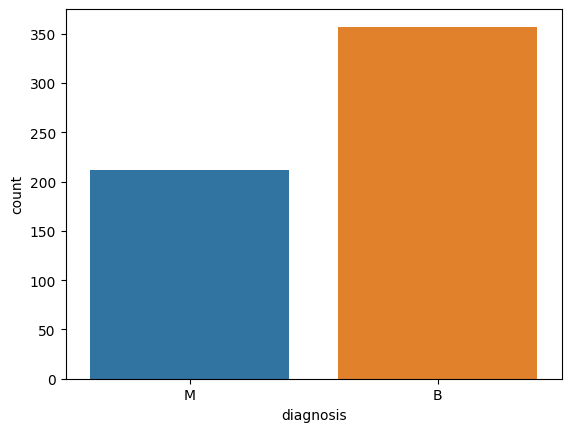

In [12]:
sns.countplot(x='diagnosis',data=df)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df['diagnosis'] = df['diagnosis'].map({'B' : 0, 'M' : 1})

In [15]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
#check correlation 
df.corr()['diagnosis'].sort_values(ascending=False)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

<AxesSubplot: >

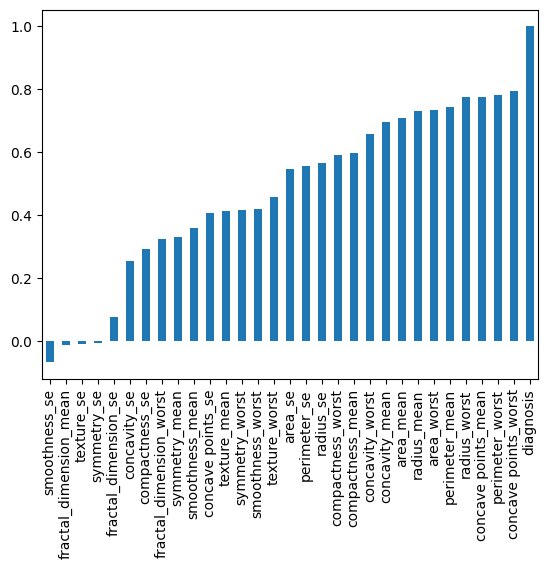

In [17]:
df.corr()['diagnosis'].sort_values().plot(kind='bar')

In [18]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [19]:
y.dtype

dtype('int64')

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train.shape

(455, 30)

In [23]:
import tensorflow as tf
#intitialization
ann=tf.keras.models.Sequential()
#adding layer(input)-using dense class(ully connected layer automatically add input layer)
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
##adding second hidden layer
##hidden layer o fully connected layer has alwys rectifier activation function
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))

##adding output layer -it contains dimention o output layer 
# for binary variable the dimension is 1 and actvationfunction for output layer is sigmoid
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
#if we have more than two outcome in target variables then we use softmax activation function
ann.compile(loss='binary_crossentropy',optimizer='adam')

In [24]:
#case1-choosing to many epochs and overfitting 

ann.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
15/15 [==============================] - 1s 16ms/step - loss: 0.6903 - val_loss: 0.6705
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6612 - val_loss: 0.6332
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.5865
Epoch 4/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5773 - val_loss: 0.5300
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5203 - val_loss: 0.4645
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4602 - val_loss: 0.3986
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4038 - val_loss: 0.3388
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3492 - val_loss: 0.2882
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3068 - val_loss: 0.2488
Epoch 10/600
15/15 [==============================] - 0s 5ms/step - loss: 0.2742 - val_loss: 0.2203
Epoch 11

In [25]:
losses=pd.DataFrame(ann.history.history)
losses

,loss,val_loss
0,0.690258,0.670468
1,0.661234,0.633239
2,0.623810,0.586521
3,0.577324,0.529968
4,0.520283,0.464503
...,...,...
595,0.001293,0.197971
596,0.001095,0.182203
597,0.001254,0.187065
598,0.001071,0.183440


<AxesSubplot: >

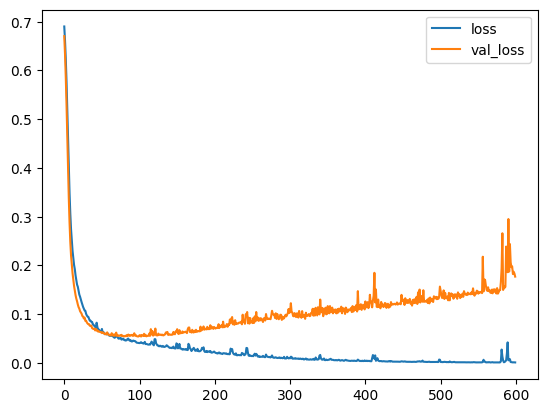

In [26]:
losses.plot()

here model go overfit

In [27]:
#evaluationround()
predictions = ann.predict(X_test).round()
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [28]:
#case2-add early stopping
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy',optimizer='adam')

In [29]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
#patience=no of epochs with no improvement
ann.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
15/15 [==============================] - 1s 13ms/step - loss: 0.6729 - val_loss: 0.6446
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6352 - val_loss: 0.6099
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6001 - val_loss: 0.5663
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.5558 - val_loss: 0.5121
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5077 - val_loss: 0.4611
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.4599 - val_loss: 0.4119
Epoch 7/600
15/15 [==============================] - 0s 5ms/step - loss: 0.4129 - val_loss: 0.3644
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3715 - val_loss: 0.3233
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3354 - val_loss: 0.2890
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.3054 - val_loss: 0.2594
Epoch 11

<AxesSubplot: >

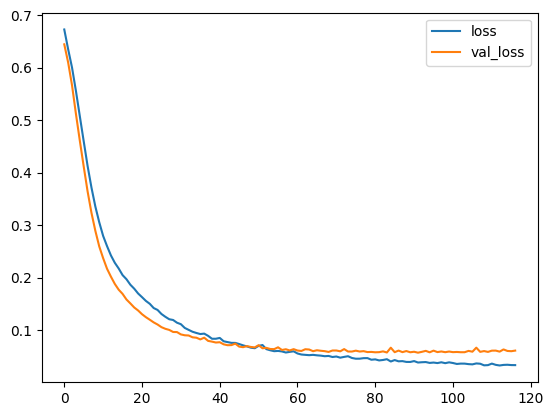

In [30]:
losses2 = pd.DataFrame(ann.history.history)
losses2.plot()

In [31]:
#evaluation
predictions = ann.predict(X_test).round()

4/4 [==============================] - 0s 2ms/step


In [32]:
#evaluationround()
predictions = ann.predict(X_test).round()
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

4/4 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [33]:
#case3-adding a dropout layer
#that shutdoen the percentage of neuron to avoid overfitting
from tensorflow.keras.layers import Dropout
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=30,activation='relu'))
ann.add(Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=15,activation='relu'))
ann.add(Dropout(0.5))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
ann.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
ann.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
15/15 [==============================] - 1s 13ms/step - loss: 0.6934 - val_loss: 0.6992
Epoch 2/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6899 - val_loss: 0.6768
Epoch 3/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6827 - val_loss: 0.6550
Epoch 4/600
15/15 [==============================] - 0s 5ms/step - loss: 0.6521 - val_loss: 0.6321
Epoch 5/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6477 - val_loss: 0.6073
Epoch 6/600
15/15 [==============================] - 0s 4ms/step - loss: 0.6201 - val_loss: 0.5785
Epoch 7/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5960 - val_loss: 0.5491
Epoch 8/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5956 - val_loss: 0.5213
Epoch 9/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5663 - val_loss: 0.4944
Epoch 10/600
15/15 [==============================] - 0s 4ms/step - loss: 0.5585 - val_loss: 0.4698
Epoch 11

In [35]:
model_loss3 = pd.DataFrame(ann.history.history)

In [36]:
model_loss3

,loss,val_loss
0,0.693411,0.699200
1,0.689919,0.676759
2,0.682669,0.655040
3,0.652065,0.632141
4,0.647687,0.607338
...,...,...
170,0.082102,0.046699
171,0.080993,0.050399
172,0.078616,0.052266
173,0.068298,0.049061


<AxesSubplot: >

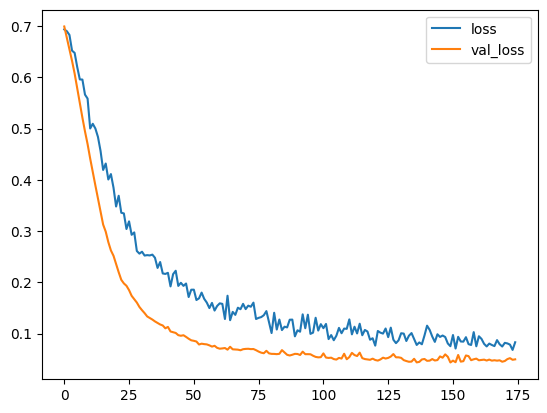

In [37]:
model_loss3.plot()

In [38]:
#evaluation
predictions = ann.predict(X_test).round()

4/4 [==============================] - 0s 2ms/step


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [40]:
print(confusion_matrix(y_test,predictions))

[[69  2]
 [ 1 42]]
